In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import plotly.graph_objects as go

In [25]:
H = pd.read_excel('Hunter_2017.xlsx','All')
L = pd.read_excel('2017_Leonard.xlsx','All')
H = H[['PLOT','Variety','IDC1','YLD3']]
L = L[['PLOT','Variety','IDC1','YLD3']]
H['Location'] = 'Hunter'
L['Location'] = 'Leonard'
df = pd.concat([H,L])
df['Plot_Loc'] = df.apply(lambda x: '{}, {}'.format(x.Location,x.PLOT),axis=1)

In [27]:
files = ['0625','0703','0708','0714','0724']

In [33]:
#Create CSV files for each flight combining the locations.
for file in files:
    
    h = pd.read_csv('{}.csv'.format(file))
    h['Plot_Loc'] = h.apply(lambda x: '{}, {}'.format(x.Location,x.PlotNumber),axis=1)
    h = pd.merge(h,df,on='Plot_Loc')
    h.to_csv('{}_complete.csv'.format(file),index=None)

<h2>Exploring the data</h2>

In [102]:
h = pd.read_excel('Hunter_2017.xlsx','All')
h = h.drop(['PLOT.1','Unnamed: 21','Unnamed: 22','Mst','Wt','YLD','MST2','YLD2','Pm','PlotNumber'],1)

In [103]:
h.columns = ['Jun25','Jul03','Jul08','Jul14','Jul24','Plot','Row','Col',
             'Trt','Variety','Rep','IDC1','YLD3']

In [104]:
h_avg = h.groupby('Trt').mean()

In [105]:
# # To compare with Dr. Helms published results.
# h_avg.sort_values(by=['03Jul'],ascending=False)

In [106]:
l = pd.read_excel('2017_Leonard.xlsx','All')
l.columns

Index([2018-06-25 00:00:00, 2018-07-03 00:00:00, 2018-07-08 00:00:00,
       2018-07-14 00:00:00, 2018-07-24 00:00:00,              'PLOT',
                     'row',               'col',               'TRT',
                 'Variety',               'REP',                'Pm',
                    'IDC1',               'Mst',                'Wt',
                     'YLD',              'MST2',              'YLD2',
                    'YLD3'],
      dtype='object')

In [107]:
l = l.drop(['Mst','Wt','YLD','MST2','YLD2','Pm'],1)

In [108]:
l.columns = ['Jun25','Jul03','Jul08','Jul14','Jul24','Plot','Row','Col',
             'Trt','Variety','Rep','IDC1','YLD3']
l.head()

Jun25     Jul03     Jul08     Jul14     Jul24  Plot  Row  Col  Trt  \
0  0.208721  0.189233  0.219215  0.231141  0.090942   101    1    1   35   
1       NaN       NaN       NaN  0.249165       NaN   102    1    2   23   
2  0.216258  0.199346  0.217564  0.211117  0.092624   103    1    3   28   
3  0.217929  0.201738  0.223049  0.236729  0.107193   104    1    4   38   
4  0.217940  0.202295  0.220064  0.210688  0.089636   105    1    5    7   

              Variety  Rep  IDC1      YLD3  
0    Dyna-Gro S11XT78    1   3.0  0.404175  
1      Integra 30808N    1   5.0       NaN  
2  Thunder SB8807NR2X    1   3.0  9.196704  
3            W1050NRX    1   3.0  5.853446  
4          REA RX0516    1   4.0  0.607239

In [109]:
dates = list(l.columns[:5])
i=4 # flight number; 0 based
fig = go.Figure()
fig.add_trace(go.Scatter(x=h[dates[i]], y=h.YLD3, mode='markers', name='Hunter'))
fig.add_trace(go.Scatter(x=l[dates[i]], y=l.YLD3, mode='markers', name='Leonard'))

fig.update_traces(opacity=0.70)
fig.update_layout(title='',
    autosize=True, width=700, height=450, yaxis=dict(title='Yield'), 
    xaxis=dict(title='DGCI'))
fig.show()

In [110]:
def auc(x):
    
    area = (x[1]+x[0])*4+(x[2]+x[1])*2.5+(x[3]+x[2])*3+(x[4]+x[3])*5
    return area

In [111]:
l['AUC'] = l.apply(auc,1)
h['AUC'] = h.apply(auc,1)
l.head()

Jun25     Jul03     Jul08     Jul14     Jul24  Plot  Row  Col  Trt  \
0  0.208721  0.189233  0.219215  0.231141  0.090942   101    1    1   35   
1       NaN       NaN       NaN  0.249165       NaN   102    1    2   23   
2  0.216258  0.199346  0.217564  0.211117  0.092624   103    1    3   28   
3  0.217929  0.201738  0.223049  0.236729  0.107193   104    1    4   38   
4  0.217940  0.202295  0.220064  0.210688  0.089636   105    1    5    7   

              Variety  Rep  IDC1      YLD3       AUC  
0    Dyna-Gro S11XT78    1   3.0  0.404175  5.574425  
1      Integra 30808N    1   5.0       NaN       NaN  
2  Thunder SB8807NR2X    1   3.0  9.196704  5.509436  
3            W1050NRX    1   3.0  5.853446  5.839577  
4          REA RX0516    1   4.0  0.607239  5.530710

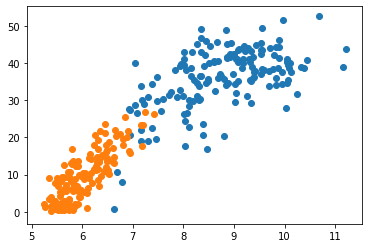

In [112]:
plt.scatter(h['AUC'],h.YLD3)
plt.scatter(l['AUC'],l.YLD3)

In [113]:
l['Jul24'].isna().sum()

4

In [114]:
l = l.dropna()

In [115]:
l.shape

(152, 14)

In [116]:
print(pearsonr(h['AUC'],h.YLD3)[0])
print(pearsonr(l['AUC'],l.YLD3)[0])

0.5731550391464697
0.8166934431795045


In [117]:
Yield = h.YLD3.append(l.YLD3)

In [118]:
Jul24 = h.Jul24.append(l.Jul24)
Jul14 = h.Jul14.append(l.Jul14)
Jul08 = h.Jul08.append(l.Jul08)
Jul03 = h.Jul03.append(l.Jul03)
Jun25 = h.Jun25.append(l.Jun25)

In [119]:
print(pearsonr(Jun25,Yield)[0])

0.8318549214190016


In [120]:
Jul24.shape

(312,)

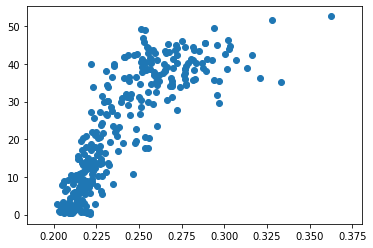

In [121]:
plt.scatter(Jun25,Yield)